Converged in 5 epochs.


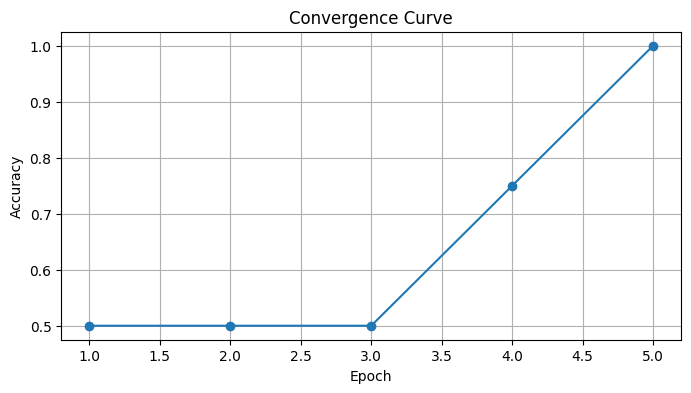

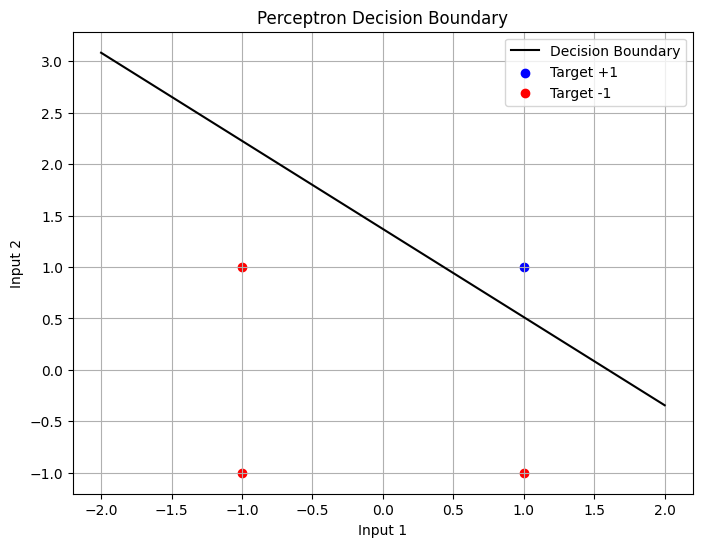

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Bipolar activation function
def bipolar_activation(x):
    return 1 if x >= 0 else -1

# Perceptron training function
def perceptron_train(inputs, targets, learning_rate=0.1, max_epochs=100):
    num_inputs = inputs.shape[1]
    num_samples = inputs.shape[0]

    # Initialize weights and bias
    weights = np.random.randn(num_inputs)
    bias = np.random.randn()

    convergence_curve = []

    for epoch in range(max_epochs):
        misclassified = 0

        for i in range(num_samples):
            net_input = np.dot(inputs[i], weights) + bias
            predicted = bipolar_activation(net_input)

            if predicted != targets[i]:
                misclassified += 1
                update = learning_rate * (targets[i] - predicted)
                weights += update * inputs[i]
                bias += update

        accuracy = (num_samples - misclassified) / num_samples
        convergence_curve.append(accuracy)

        if misclassified == 0:
            print("Converged in {} epochs.".format(epoch + 1))
            break

    return weights, bias, convergence_curve

# Main function
if __name__ == "__main__":
    # Input and target data (bipolar representation for AND function)
    inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
    targets = np.array([-1, -1, -1, 1])

    # Training the perceptron
    weights, bias, convergence_curve = perceptron_train(inputs, targets)

    # Decision boundary line
    x = np.linspace(-2, 2, 100)
    y = (-weights[0] * x - bias) / weights[1]

    # Plot convergence curve
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(convergence_curve) + 1), convergence_curve, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Convergence Curve')
    plt.grid(True)
    plt.show()

    # Plot the decision boundary line and data points
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Decision Boundary', color='black')
    plt.scatter(inputs[targets == 1][:, 0], inputs[targets == 1][:, 1], color='blue', label='Target +1')
    plt.scatter(inputs[targets == -1][:, 0], inputs[targets == -1][:, 1], color='red', label='Target -1')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()
